# Linear Regression Practical Implementation

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
dataset = fetch_california_housing()

In [6]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
dataset.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [8]:
print(dataset.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [9]:
print(dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [10]:
print(dataset.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [11]:
import pandas as pd

In [12]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
df['Price']=dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [16]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [17]:
import seaborn as sns

StopIteration: 

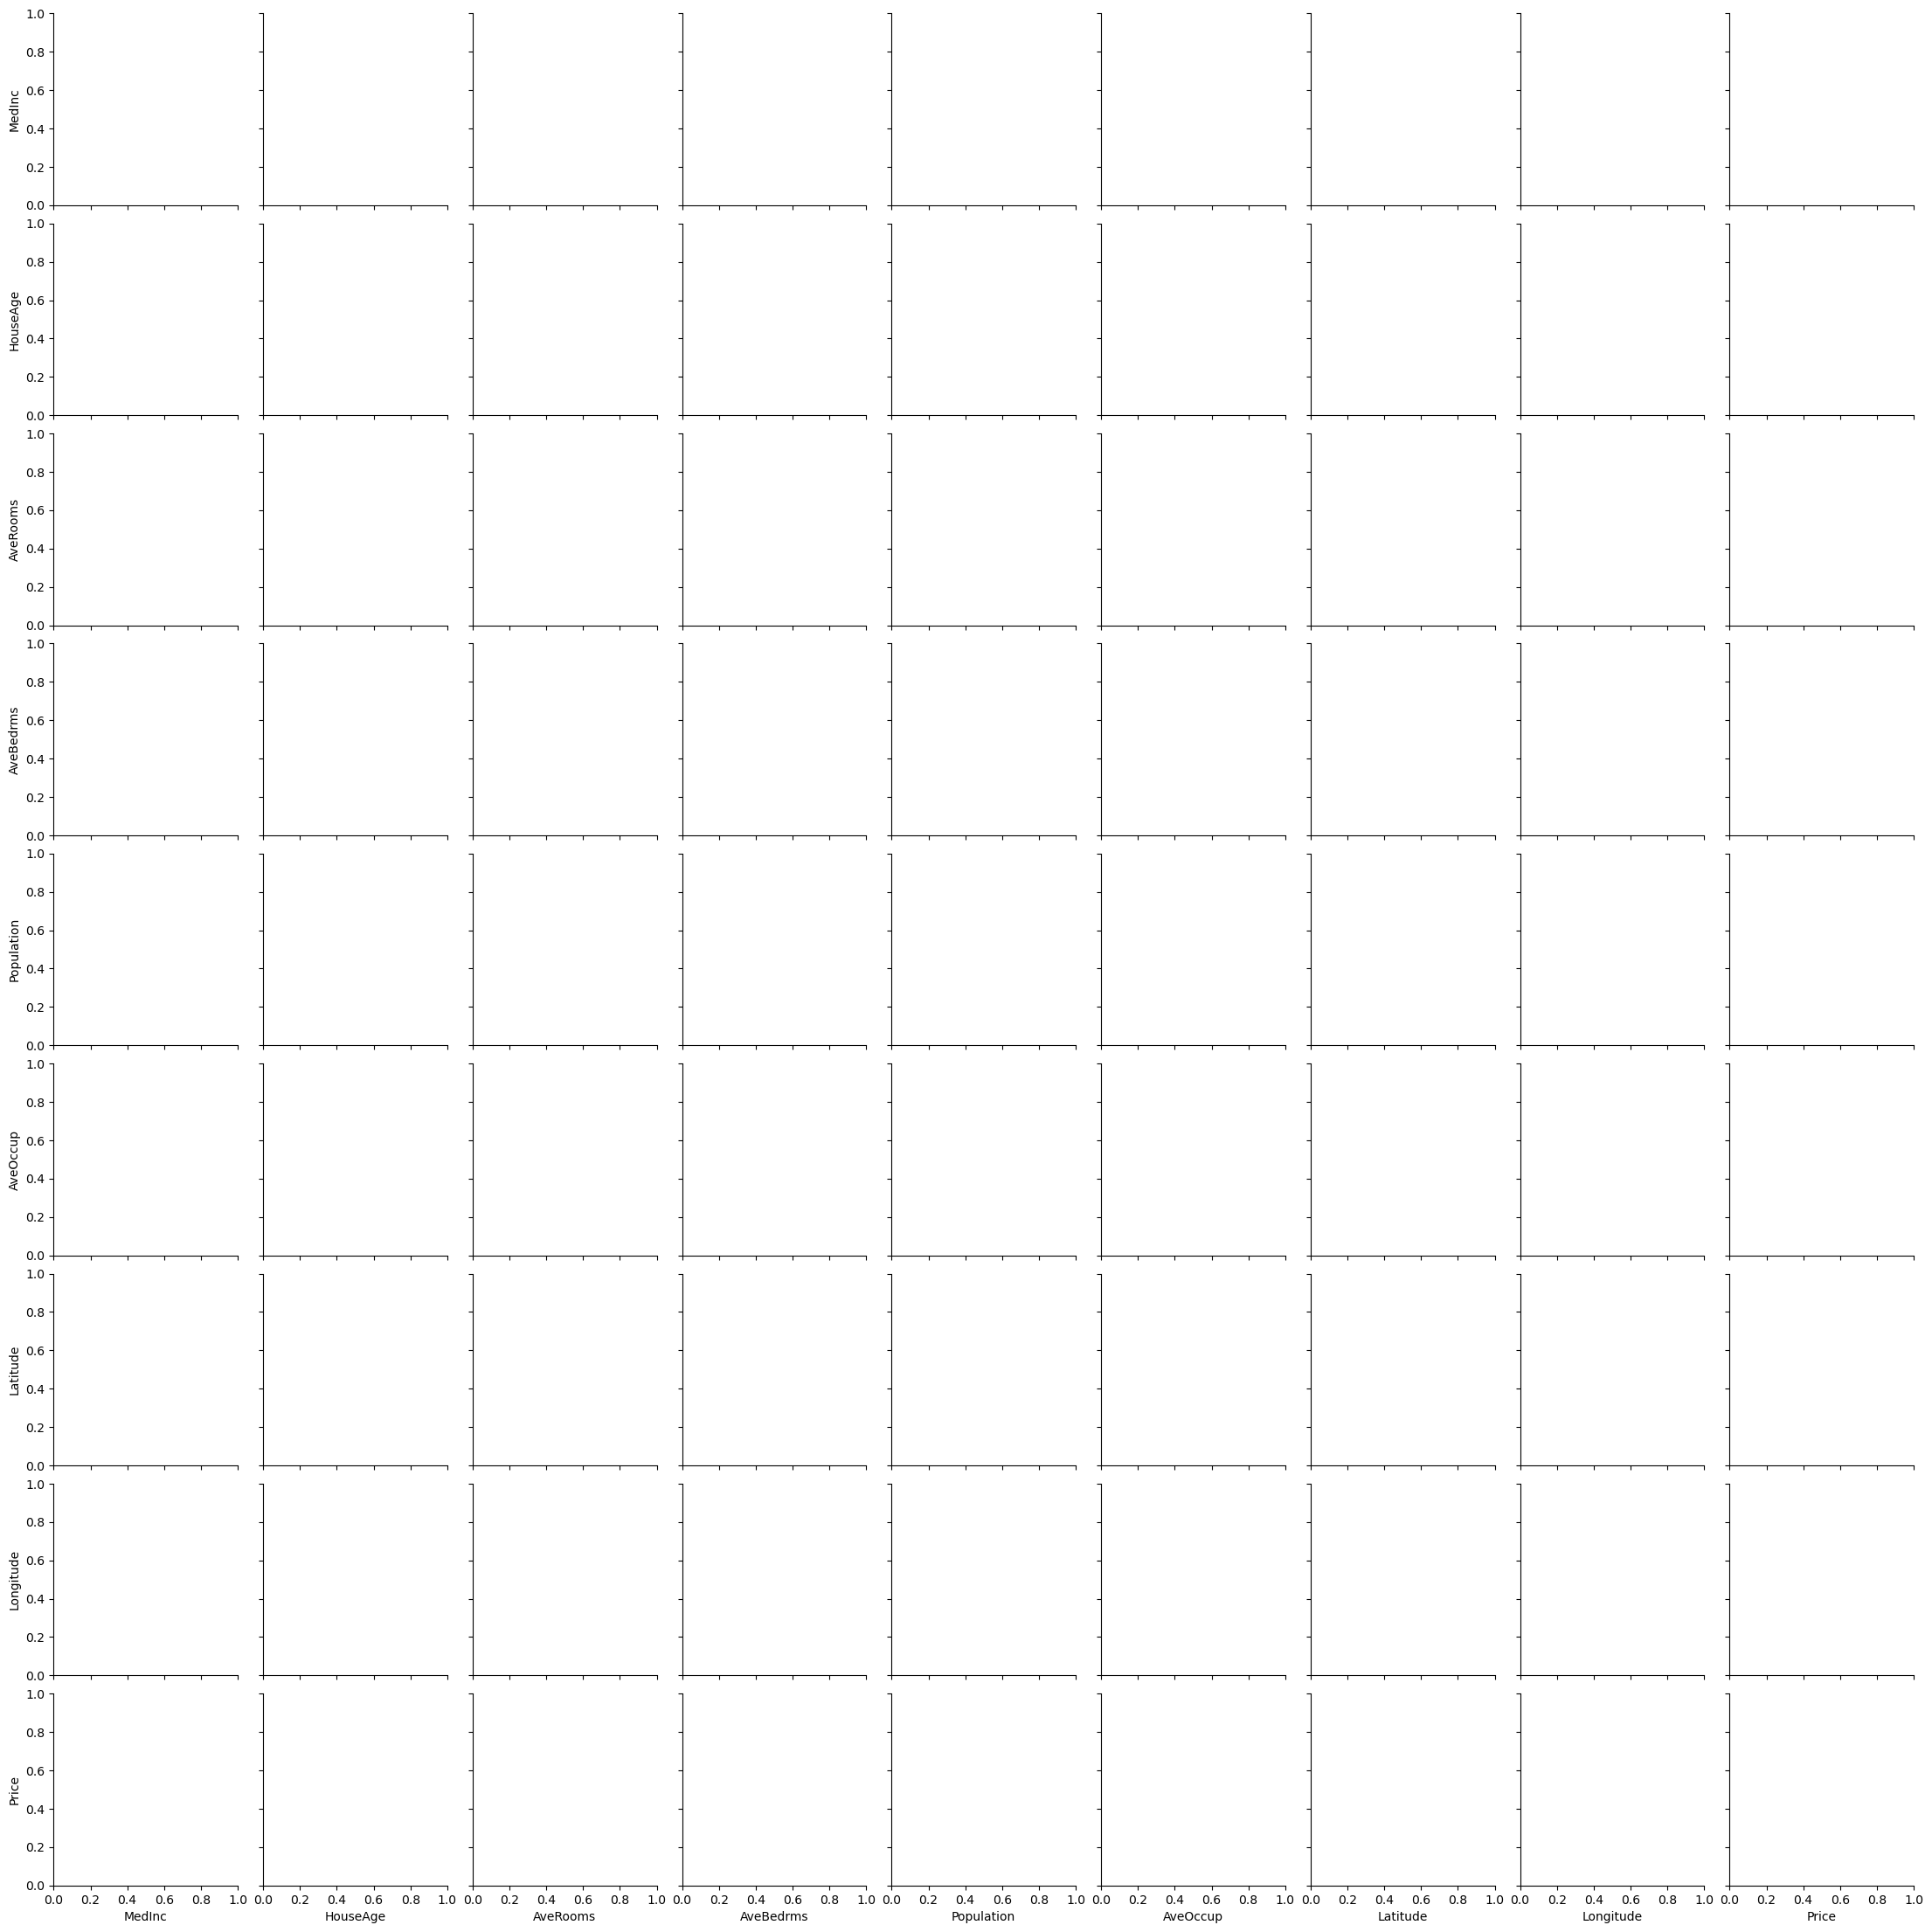

In [19]:
sns.pairplot(df)

In [21]:
df_copy=df.sample(frac=0.25)

In [22]:
df_copy.shape

(5160, 9)

StopIteration: 

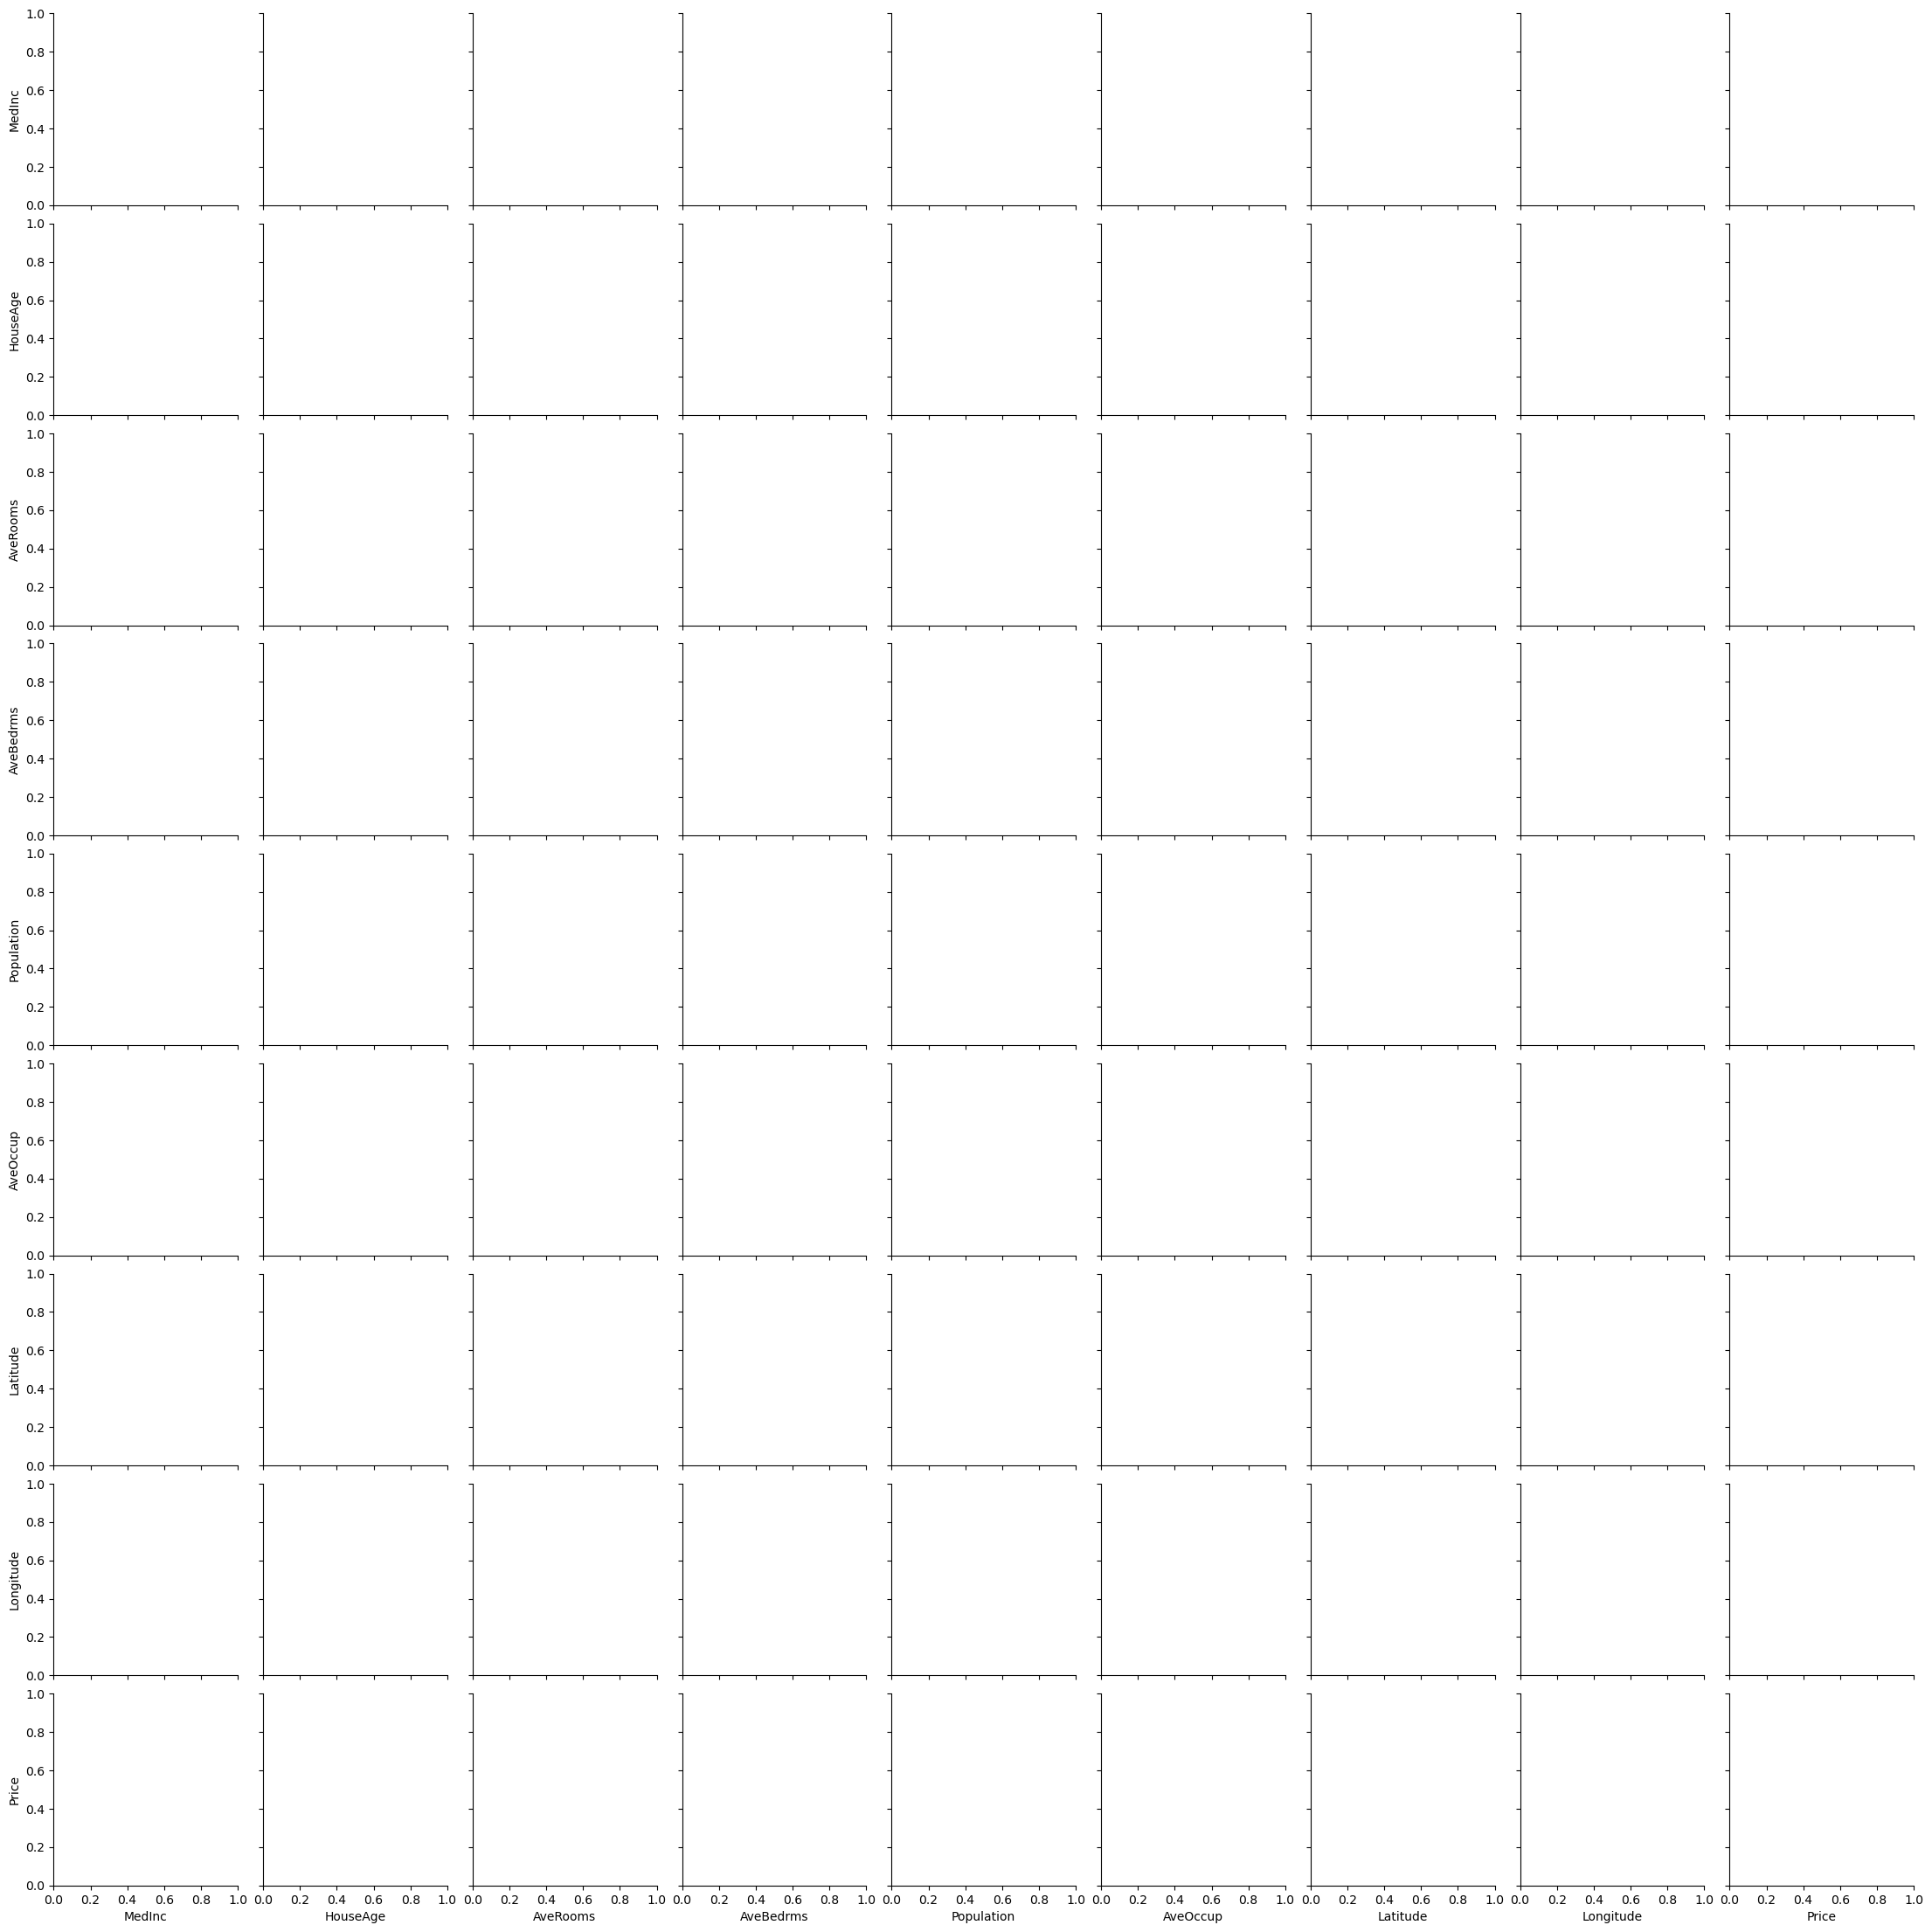

In [23]:
sns.pairplot(df_copy)

In [24]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [25]:
# Divide the dataset into independent and dependent

In [35]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
X.shape

(20640, 8)

In [50]:
X_train.shape,X_test.shape

((13828, 8), (6812, 8))

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [41]:
scaler.fit(X_train)

StandardScaler()

In [44]:
X_train=scaler.transform(X_train)

In [45]:
X_train

array([[-1.52169954, -0.75868455, -0.91813082, ..., -0.04014979,
        -0.78315293,  0.65090402],
       [ 0.18205382,  0.3523991 ,  0.30748451, ..., -0.05943619,
         0.8475975 , -1.31911678],
       [-0.17232772,  1.06666717, -0.25107784, ...,  0.09515433,
        -0.87218816,  0.66087881],
       ...,
       [-0.49518065,  0.59048846, -0.59192622, ...,  0.01608523,
        -0.75972261,  0.60103008],
       [ 0.96816708, -1.07613702,  0.39144665, ...,  0.0039722 ,
         0.90383028, -1.18445713],
       [-0.68377427,  1.86029835, -0.83041358, ..., -0.08065717,
         0.9928655 , -1.41387727]])

In [47]:
X_test=scaler.transform(X_test)

In [48]:
X_test

array([[-1.15370815, -0.28250584, -0.50803348, ...,  0.05921216,
         0.19154848,  0.28682423],
       [-0.70700034,  0.11430975, -0.16215378, ..., -0.03549556,
        -0.23956945,  0.06239148],
       [-0.20842797,  1.86029835, -0.59583032, ..., -0.13983657,
         1.0069237 , -1.42385206],
       ...,
       [-0.02167353, -1.07613702,  0.40141018, ...,  0.03744641,
         1.43335556, -0.90516304],
       [ 0.27275111, -1.47295261,  0.29311784, ...,  0.0519346 ,
        -0.73160623,  1.09478213],
       [-0.59570436,  1.78093523, -0.64482761, ..., -0.06665881,
         0.99755157, -1.43881424]])

In [52]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [53]:
regression.fit(X_train,y_train)

LinearRegression()

In [54]:
regression.coef_

array([ 8.46603472e-01,  1.20333548e-01, -2.98800785e-01,  3.47243173e-01,
       -8.81413334e-05, -4.17242067e-02, -8.94420371e-01, -8.70401317e-01])

In [55]:
regression.intercept_

2.0666362048018536

In [61]:
# Prediction
y_pred=regression.predict(X_test)

In [62]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [63]:
import numpy as np
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

0.5369686543372458
0.5295710106684453
0.7327814505957734


In [64]:
## Accuracy r2 and adjusted r square
from sklearn.metrics import r2_score

In [66]:
score=r2_score(y_test,y_pred)

In [67]:
score

0.5970494128783954

In [68]:
#display adjusted R-squared
1 - (1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)

0.5968931623477876

In [74]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=20.2)
ridge.fit(X_train,y_train)

Ridge(alpha=20.2)

In [75]:
y_pred=ridge.predict(X_test)

In [76]:
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

0.5365628124115079
0.529526915026341
0.7325044794480836


In [77]:
from sklearn .linear_model import Lasso

In [80]:
lasso=Lasso(alpha=08.0)
lasso.fit(X_train,y_train)

Lasso(alpha=8.0)

In [81]:
y_pred=lasso.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)
print(np.sqrt(mse))

1.3326257277946882
0.9126511897647483
1.15439409553007


In [82]:
from sklearn.linear_model import ElasticNet

In [83]:
elasticnet=ElasticNet(alpha=20.0)
lasso.fit(X_train,y_train)

Lasso(alpha=8.0)

In [84]:
df_copy.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.131071,0.299117,-0.067919,0.027771,-0.020134,-0.063908,-0.032133,0.690833
HouseAge,-0.131071,1.000000,-0.138977,-0.068931,-0.302191,0.013299,0.019891,-0.116982,0.095750
AveRooms,0.299117,-0.138977,1.000000,0.866838,-0.044526,-0.031208,0.099939,-0.033020,0.163200
AveBedrms,-0.067919,-0.068931,0.866838,1.000000,-0.053891,-0.047536,0.062683,0.014193,-0.029057
Population,0.027771,-0.302191,-0.044526,-0.053891,1.000000,0.146294,-0.115345,0.106166,-0.008464
AveOccup,-0.020134,0.013299,-0.031208,-0.047536,0.146294,1.000000,-0.108522,0.108202,-0.179764
Latitude,-0.063908,0.019891,0.099939,0.062683,-0.115345,-0.108522,1.000000,-0.924645,-0.121741
Longitude,-0.032133,-0.116982,-0.033020,0.014193,0.106166,0.108202,-0.924645,1.000000,-0.068806
Price,0.690833,0.095750,0.163200,-0.029057,-0.008464,-0.179764,-0.121741,-0.068806,1.000000
